### 7.	Визуализация данных в seaborn.

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [296]:
data = pd.read_csv('Online Retail.csv', sep = ';', parse_dates = ['InvoiceDate'])  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Проверяем как загрузились данные (вывод первых, последних и слуайно выбранных строк).

In [297]:
data.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,581483,23843,PAPER CRAFT . LITTLE BIRDIE,80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom,NaN


In [298]:
data.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
541906,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,NaN
541907,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,NaN
541908,C581484,23843,PAPER CRAFT . LITTLE BIRDIE,-80995,2011-09-12 09:27:00,2.08,16446.0,United Kingdom,NaN


In [299]:
data.sample(3, random_state = 123)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
344102,562932,21219,SET/4 BADGES BALLOON GIRL,2,2011-10-08 16:39:00,1.25,16904.0,United Kingdom,NaN
181320,581233,23455,SMALL PARLOUR PICTURE FRAME,6,2011-08-12 10:33:00,2.89,13436.0,United Kingdom,NaN
486278,552000,21802,CHRISTMAS TREE HEART DECORATION,1,2011-05-05 15:56:00,0.42,NaN,United Kingdom,NaN


Удаляем "лишний" столбец.

In [300]:
df = data.drop(columns = ['Unnamed: 8'])

In [301]:
df['Quantity'] = df['Quantity'].astype('int')
df['CustomerID'] = df['CustomerID'].astype('str')
df['UnitPrice'] = df['UnitPrice'].astype('float')
df['Country'] = df['Country'].astype('category')

In [302]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,581483,23843,PAPER CRAFT . LITTLE BIRDIE,80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom


In [303]:
df['revenue'] = df['Quantity']*df['UnitPrice']
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceD'] = df['InvoiceDate'].dt.date
df['Invoicedayofweek'] = df['InvoiceDate'].dt.dayofweek
df['InvoiceMonth'].value_counts()

11    73594
10    56920
9     51289
7     47097
6     46119
8     44887
5     42659
1     39769
3     38669
4     37180
2     33841
12    29885
Name: InvoiceMonth, dtype: int64

In [304]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue,InvoiceMonth,InvoiceD,Invoicedayofweek
0,581483,23843,PAPER CRAFT . LITTLE BIRDIE,80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom,168469.6,9,2011-09-12,0


Документация по библиотеки seaborn: https://seaborn.pydata.org/

Проанализируем динамику продаж используя seaborn. Для этого сначала создадим сводную таблицу с агрегацией по дате/месяцу совершения покупки.

In [305]:
table = pd.pivot_table(df, index=['InvoiceD'],
               aggfunc={'revenue': [np.mean, np.median, sum, min, max],
                        'Quantity': np.mean})
table

Quantity   revenue                                       
                 mean       max       mean  median       min       sum
InvoiceD                                                              
2010-01-12   8.627413   1627.20  18.866010   8.420    -41.40  58635.56
2010-02-12   9.968231   1576.80  21.909569  13.200   -403.20  46207.28
2010-03-12   6.734787   1314.00  20.717738   8.455   -367.20  45620.46
2010-05-12   6.016514    525.60  11.517046   5.100   -175.60  31383.95
2010-06-12   5.523208   1627.20  13.888649   6.720   -151.20  53860.18
...               ...       ...        ...     ...       ...       ...
2011-12-06   8.820465    833.25  11.612893   6.300     -8.95  12483.86
2011-12-07   8.254349   1305.60  15.532118   6.630    -76.50  25892.04
2011-12-08  10.661319  11062.06   8.956756  12.600 -11062.06  10049.48
2011-12-09  10.038778    270.00  17.061874  12.500    -39.60  29039.31
2011-12-10   7.079343    320.00  13.361993  10.080   -114.00  29302.85

[305 rows x 6 columns]

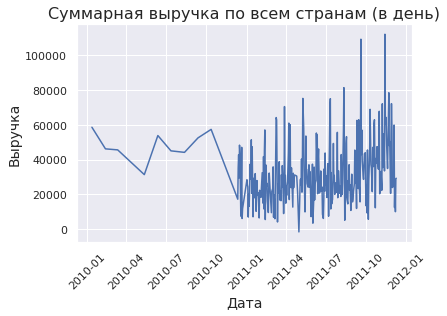

In [306]:
#sns.set_theme()
sns.axes_style("whitegrid")
#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 1})
ax = sns.lineplot(data=table, x=table[('revenue','sum')].index, y=table[('revenue','sum')])
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 45);
plt.xticks(rotation=45)
plt.xlabel('Дата',fontsize=14)
plt.ylabel('Выручка',fontsize=14)
plt.title('Суммарная выручка по всем странам (в день)',fontsize=16)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen',"lines.linewidth": 2.5}) # #33FF00

In [307]:
def revenue_country_Date(df, country):
  df_country = df[df['Country'] == country]
  table_c = pd.pivot_table(df_country, index=['InvoiceD'],
               aggfunc={'revenue': [np.mean, np.median, sum, min, max],
                        'Quantity': np.mean})
  return table_c

In [308]:
table_UK = revenue_country_Date(df, "United Kingdom")
table_EIRE = revenue_country_Date(df, "EIRE")
table_Germany = revenue_country_Date(df, "Germany")
table_France = revenue_country_Date(df, "France")

In [309]:
len(table_France)

222

In [310]:
len(table_Germany)

232

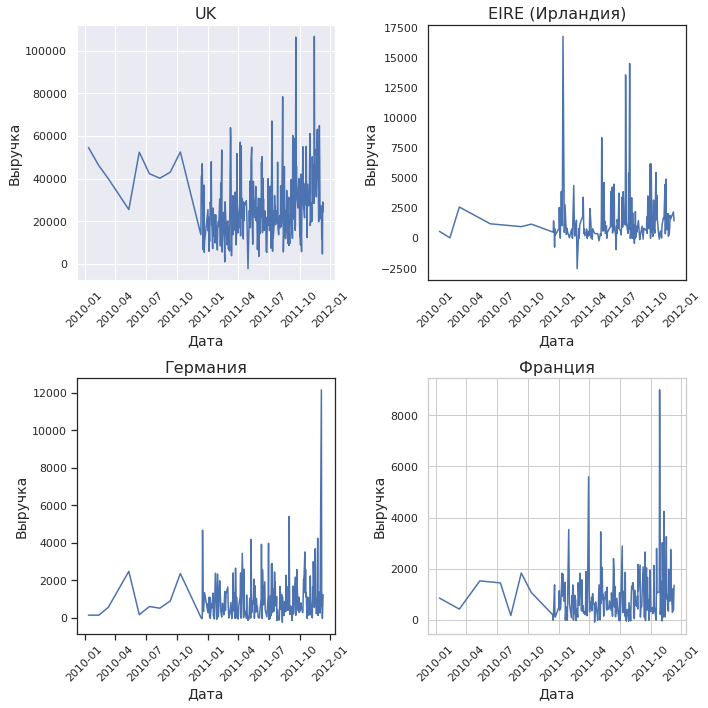

In [311]:
sns.set_theme()
f = plt.figure(figsize=(10, 10))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    ax = sns.lineplot(data=table_UK, x=table_UK[('revenue','sum')].index, y=table_UK[('revenue','sum')])
    plt.xticks(rotation=45)
    plt.xlabel('Дата',fontsize=14)
    plt.ylabel('Выручка',fontsize=14)
    plt.title('UK',fontsize=16)

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    ax = sns.lineplot(data=table_EIRE, x=table_EIRE[('revenue','sum')].index, y=table_EIRE[('revenue','sum')])
    plt.xticks(rotation=45)
    plt.xlabel('Дата',fontsize=14)
    plt.ylabel('Выручка',fontsize=14)
    plt.title('EIRE (Ирландия)',fontsize=16)

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    ax = sns.lineplot(data=table_Germany, x=table_Germany[('revenue','sum')].index, y=table_Germany[('revenue','sum')])
    plt.xticks(rotation=45)
    plt.xlabel('Дата',fontsize=14)
    plt.ylabel('Выручка',fontsize=14)
    plt.title('Германия',fontsize=16)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    ax = sns.lineplot(data=table_France, x=table_France[('revenue','sum')].index, y=table_France[('revenue','sum')])
    plt.xticks(rotation=45)
    plt.xlabel('Дата',fontsize=14)
    plt.ylabel('Выручка',fontsize=14)
    plt.title('Франция',fontsize=16)

f.tight_layout()

### Анализ выручки по месяцам

In [312]:
def revenue_country_month(df, country):
  df_country = df[df['Country'] == country]
  table_c_month = pd.pivot_table(df_country, index=['InvoiceMonth'],
               #columns=['revenue', 'Quantity'],
               aggfunc={'revenue': [np.mean, np.median, sum, min, max],
                        'Quantity': [np.median, sum, min, max, np.mean]})
  return table_c_month

In [313]:
m = table[('revenue','sum')].median()
m

27978.41

In [314]:
table_m_UK = revenue_country_month(df, "United Kingdom")
table_m_EIRE = revenue_country_month(df, "EIRE")
table_m_Germany = revenue_country_month(df, "Germany")
table_m_France = revenue_country_month(df, "France")

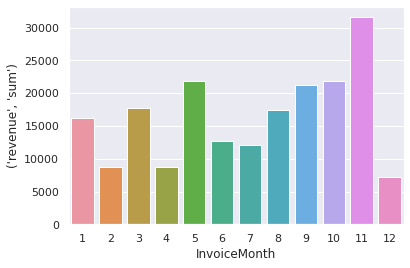

In [315]:
sns.barplot(x=table_m_France[('revenue','sum')].index, y=table_m_France[('revenue','sum')])

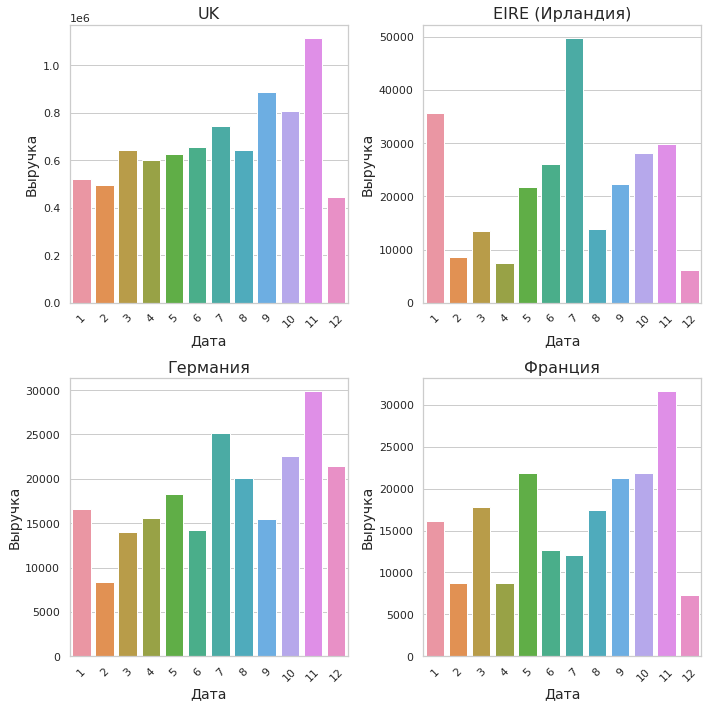

In [316]:
sns.set_theme()
f = plt.figure(figsize=(10, 10))
gs = f.add_gridspec(2, 2)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 0])
    ax = sns.barplot(x=table_m_UK[('revenue','sum')].index, y=table_m_UK[('revenue','sum')])
    plt.xticks(rotation=45)
    plt.xlabel('Дата',fontsize=14)
    plt.ylabel('Выручка',fontsize=14)
    plt.title('UK',fontsize=16)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 1])
    ax = sns.barplot(x=table_m_EIRE[('revenue','sum')].index, y=table_m_EIRE[('revenue','sum')])
    plt.xticks(rotation=45)
    plt.xlabel('Дата',fontsize=14)
    plt.ylabel('Выручка',fontsize=14)
    plt.title('EIRE (Ирландия)',fontsize=16)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 0])
    ax = sns.barplot(x=table_m_Germany[('revenue','sum')].index, y=table_m_Germany[('revenue','sum')])
    plt.xticks(rotation=45)
    plt.xlabel('Дата',fontsize=14)
    plt.ylabel('Выручка',fontsize=14)
    plt.title('Германия',fontsize=16)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    ax = sns.barplot(x=table_m_France[('revenue','sum')].index, y=table_m_France[('revenue','sum')])
    plt.xticks(rotation=45)
    plt.xlabel('Дата',fontsize=14)
    plt.ylabel('Выручка',fontsize=14)
    plt.title('Франция',fontsize=16)

f.tight_layout()

### Анализ выбросов

In [317]:
def Rev_Country(df, country):
  df_country = df[df['Country'] == country]
  return df_country

In [318]:
Rev_UK = Rev_Country(df, "United Kingdom")
Rev_EIRE = Rev_Country(df, "EIRE")
Rev_Germany = Rev_Country(df, "Germany")
Rev_France = Rev_Country(df, "France")

In [319]:
Rev_UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue,InvoiceMonth,InvoiceD,Invoicedayofweek
0,581483,23843,PAPER CRAFT . LITTLE BIRDIE,80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom,168469.6,9,2011-09-12,0
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1,2011-01-18,1
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.0,11,2011-11-25,4
3,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,nan,United Kingdom,0.0,1,2011-01-28,4
4,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.0,10,2011-10-27,3


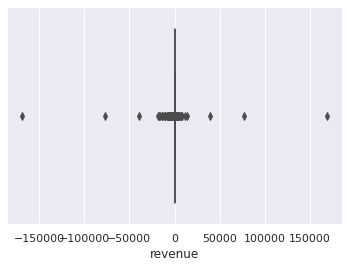

In [320]:
sns.boxplot(x = Rev_UK['revenue'])
plt.show()

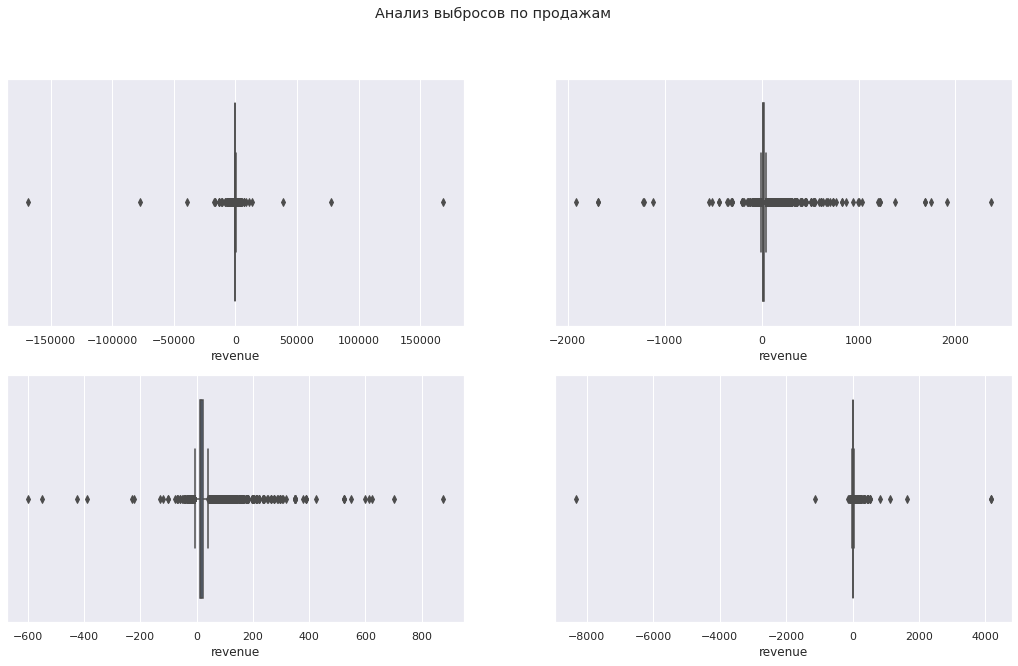

In [321]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Анализ выбросов по продажам')

sns.boxplot(ax=axes[0, 0], x = Rev_UK['revenue'])
sns.boxplot(ax=axes[0, 1], x = Rev_EIRE['revenue'])
sns.boxplot(ax=axes[1, 0], x = Rev_Germany['revenue'])
sns.boxplot(ax=axes[1, 1], x = Rev_France['revenue']);

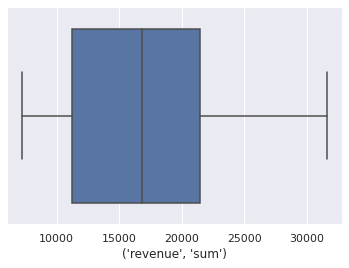

In [322]:
sns.boxplot(x = table_m_France[('revenue','sum')])
plt.show()

In [323]:
table_m = pd.pivot_table(df, index=['InvoiceMonth'],
               aggfunc={'revenue': [np.mean, np.median, sum, min, max],
                        'Quantity': [np.mean, np.median, sum, min, max]})

In [324]:
 table_m

Quantity                                         revenue  \
                  max       mean median      min       sum        max   
InvoiceMonth                                                            
1             74215.0   9.107999    3.0 -74215.0  362216.0   77183.60   
2              3906.0   9.407198    3.0  -9360.0  318349.0    3202.92   
3              2592.0  10.238149    3.0  -2472.0  395899.0    8142.75   
4              3114.0   9.861269    3.0  -3114.0  366642.0    6539.40   
5              4300.0  10.462036    4.0  -1300.0  446300.0    3160.08   
6              2000.0   8.796570    3.0  -9600.0  405689.0    4401.00   
7              3186.0  10.426566    3.0  -3100.0  491060.0   13541.33   
8              2000.0   8.855236    3.0  -3000.0  397485.0    3254.40   
9             80995.0  10.607089    4.0 -80995.0  544027.0  168469.60   
10             4800.0   9.003566    3.0  -4830.0  512483.0   38970.00   
11            12540.0   8.856795    3.0  -2376.0  651807.0    6539.40   
12             2400.0   9.519592    3.0  -1350.0  284493.0   11062.06   

                                                        
                   mean median        min          sum  
InvoiceMonth                                            
1             16.756360   8.50  -77183.60   666383.670  
2             17.396614   9.96   -6721.37   588718.820  
3             19.593989   9.92   -8142.75   757679.970  
4             17.755502   9.90   -6539.40   660149.571  
5             17.936503  10.04  -17836.46   765153.270  
6             17.327187   8.50   -5791.18   799112.520  
7             18.874881   9.36  -13541.33   888950.281  
8             16.927452   9.87   -6662.51   759822.560  
9             20.376447  10.20 -168469.60  1045087.582  
10            17.379780   8.85  -38970.00   989257.070  
11            17.631959   8.25   -1836.00  1297606.420  
12            17.728834   8.85  -11062.06   529826.200

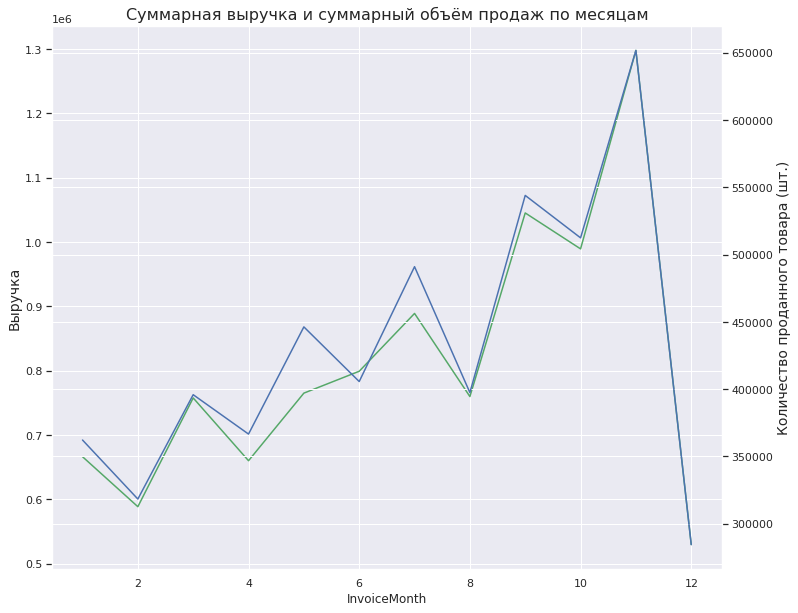

In [325]:
plt.figure(figsize=(12, 10))
sns.lineplot(x=table_m[('revenue','sum')].index, y=table_m[('revenue','sum')], color="g")
plt.ylabel('Выручка',fontsize=14)
ax2 = plt.twinx()
sns.lineplot(x=table_m[('Quantity','sum')].index, y=table_m[('Quantity','sum')], color="b", ax=ax2)
plt.xticks(rotation=45)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество проданного товара (шт.)', fontsize=14)
plt.title('Суммарная выручка и суммарный объём продаж по месяцам', fontsize=16)
plt.show()

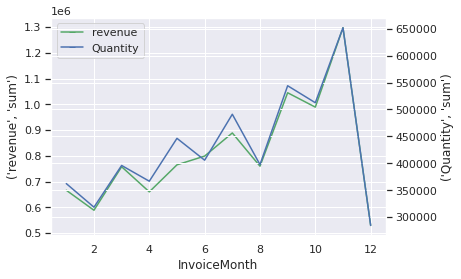

In [326]:
from matplotlib.lines import Line2D
    
g = sns.lineplot(x=table_m[('revenue','sum')].index, y=table_m[('revenue','sum')], color="g")
sns.lineplot(x=table_m[('Quantity','sum')].index, y=table_m[('Quantity','sum')], color="b", ax=g.axes.twinx())
g.legend(handles=[Line2D([], [], marker='_', color="g", label='revenue'), Line2D([], [], marker='_', color="b", label='Quantity')]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


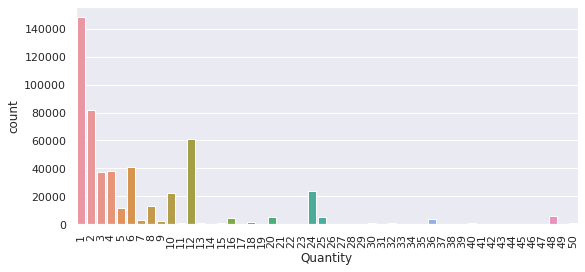

In [327]:
fig, ax = plt.subplots(figsize = (9,4))
ax = sns.countplot(df[(df['Quantity'] <= 50)&(df['Quantity'] >= 0)]['Quantity'])
plt.xlabel('Quantity')
plt.xticks(rotation = 90);

In [328]:
df['UnitPrice'].value_counts()

1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
181.34        1
143.18        1
160.37        1
178.12        1
0.01          1
Name: UnitPrice, Length: 1630, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


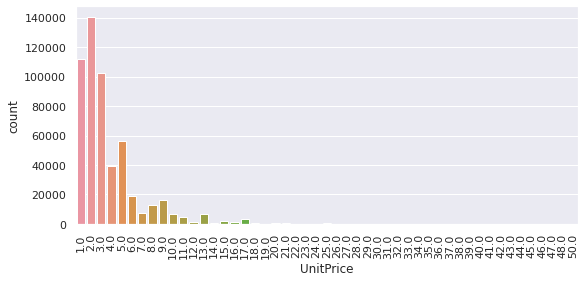

In [329]:
fig, ax = plt.subplots(figsize = (9,4))
df['UnitPrice_round'] = np.ceil(df['UnitPrice'])
ax = sns.countplot(df[(df['UnitPrice_round'] <= 50)&(df['UnitPrice_round'] > 0)]['UnitPrice_round'])
plt.xlabel('UnitPrice')
plt.xticks(rotation = 90);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


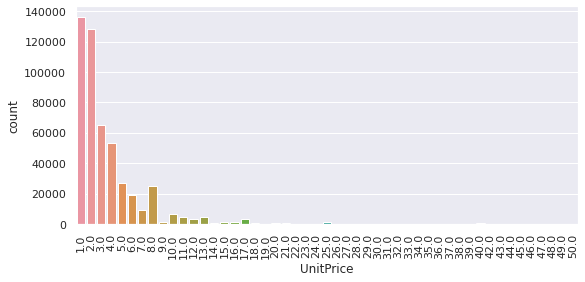

In [330]:
fig, ax = plt.subplots(figsize = (9,4))
df['UnitPrice_round'] = round(df['UnitPrice'])
ax = sns.countplot(df[(df['UnitPrice_round'] <= 50)&(df['UnitPrice_round'] > 0)]['UnitPrice_round'])
plt.xlabel('UnitPrice')
plt.xticks(rotation = 90);

### Тепловая карта

In [331]:
corr = df.corr()
corr

,Quantity,UnitPrice,revenue,InvoiceMonth,Invoicedayofweek,UnitPrice_round
Quantity,1.000000,-0.001235,0.886681,-0.000702,-0.001908,-0.001246
UnitPrice,-0.001235,1.000000,-0.162029,-0.000917,-0.005002,0.999996
revenue,0.886681,-0.162029,1.000000,0.000226,-0.002834,-0.162018
InvoiceMonth,-0.000702,-0.000917,0.000226,1.000000,-0.029663,-0.000960
Invoicedayofweek,-0.001908,-0.005002,-0.002834,-0.029663,1.000000,-0.004983
UnitPrice_round,-0.001246,0.999996,-0.162018,-0.000960,-0.004983,1.000000


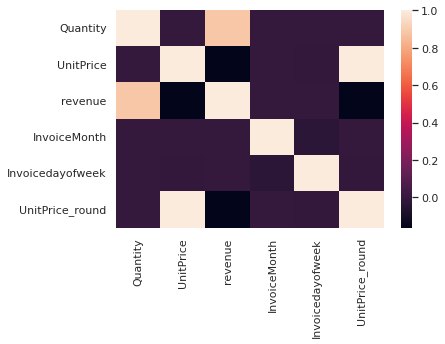

In [332]:
ax = sns.heatmap(corr)

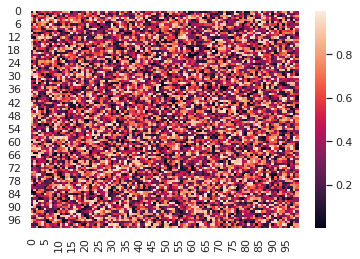

In [333]:
uniform_data = np.random.rand(100, 100)
ax = sns.heatmap(uniform_data)

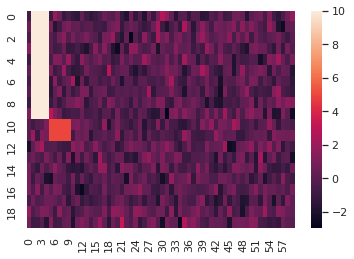

In [334]:
normal_data = np.random.normal(size = (20,60))
normal_data[:10,1:5] = 10
normal_data[10:12,5:10] = 5
ax = sns.heatmap(normal_data)